# Question 01 : Logistic Regression Weight Update Process

In [37]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . datasets import make_blobs

# Generate synthetic data
np. random . seed (0)
centers = [[ -5 , 0], [0, 1.5]]
X, y = make_blobs ( n_samples =1000 , centers = centers ,random_state =40)
transformation = [[0.4 , 0.2] , [ -0.4 , 1.2]]
X = np.dot(X, transformation )

# Add a bias term to the feature matrix
X = np.c_[np. ones ((X. shape [0] , 1)), X]

# Initialize coefficients
W = np. zeros (X. shape [1])

# Define the logistic sigmoid function
def sigmoid (z):
    return 1 / (1 + np.exp(-z))

# Define the logistic loss ( binary cross - entropy)function
def log_loss (y_true , y_pred ):
    epsilon = 1e-15
    y_pred = np. clip (y_pred , epsilon , 1 - epsilon ) # Clipto avoid log (0)
    return - ( y_true * np. log ( y_pred ) + (1 - y_true ) * np.log (1 - y_pred ))

# Gradient descent and Newton method parameters
learning_rate = 0.1
iterations = 10
loss_history_BGD= []
loss_history_Newton = []

one_matrix = np.ones((X.shape[0], 1))
W=W.reshape(3,1)
y=y.reshape(len(y),1)


In [38]:
#performing Batch Gradient Descent

for i in range ( iterations ):
    y_pred = sigmoid ( np. dot (X , W))
    loss = log_loss ( y , y_pred )
    loss_history_BGD . append ( np. sum ( np.mean(loss) ))
    residual = y_pred - y
    residual = residual.reshape(len(residual))
    diagonal_residual = np. diag ( residual )
    gradient = one_matrix. T @ diagonal_residual@ X 
    gradient = gradient.T / y . size
    W -= learning_rate * gradient
    print ( f'Iteration {i} : Loss {loss_history_BGD [i]}')

Iteration 0 : Loss 0.6931471805599454
Iteration 1 : Loss 0.6328211522065751
Iteration 2 : Loss 0.5823972949578101
Iteration 3 : Loss 0.5400400231011129
Iteration 4 : Loss 0.5042051102371915
Iteration 5 : Loss 0.4736389534183553
Iteration 6 : Loss 0.44734329598374695
Iteration 7 : Loss 0.4245298511469433
Iteration 8 : Loss 0.4045770169455826
Iteration 9 : Loss 0.38699321002389653


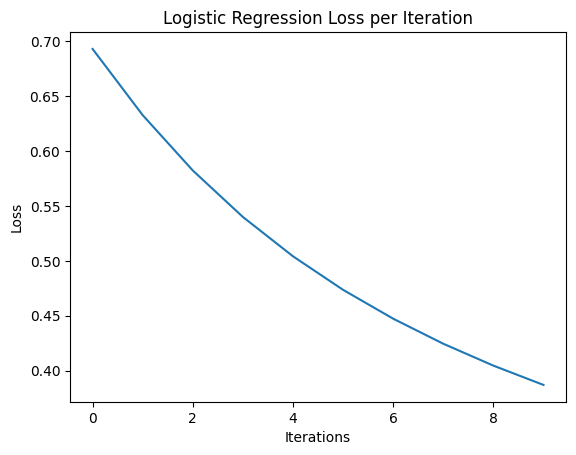

In [39]:
# Plot the loss function over iterations
plt. figure ()
plt. plot ( np. arange ( iterations ), loss_history_BGD )
plt. title ('Logistic Regression Loss per Iteration')
plt. xlabel ('Iterations')
plt. ylabel ('Loss')
plt. show ()

In [40]:
# perform Newton's method
W = np. zeros (X. shape [1])
W=W.reshape(3,1)

for i in range ( iterations ):
    y_pred = sigmoid ( np. dot (X , W))

    s = ( (y_pred - y) * (1 - y_pred - y))
    s = s.reshape(len(s))
    S = np.diag(s)

    mulfact_a = X.T @ S @ X
    mulfact_a = mulfact_a / y . size
    mulfact_a = np.linalg.inv(mulfact_a)

    loss = log_loss ( y , y_pred )
    loss_history_Newton . append ( np. sum ( np.mean(loss) ))

    residual = y_pred - y
    residual = residual.reshape(len(residual))
    diagonal_residual = np. diag ( residual )

    mulfact_b= one_matrix. T @ diagonal_residual@ X 
    mulfact_b = mulfact_b.T / y . size

    W -= mulfact_a @ mulfact_b
    

    print ( f'Iteration {i} : Loss {loss_history_Newton [i]}')

Iteration 0 : Loss 0.6931471805599454
Iteration 1 : Loss 0.19326424132410205
Iteration 2 : Loss 0.09113723316903423
Iteration 3 : Loss 0.04938058810733571
Iteration 4 : Loss 0.030716074598479824
Iteration 5 : Loss 0.022022549931970507
Iteration 6 : Loss 0.01807356045399721
Iteration 7 : Loss 0.016618032722628157
Iteration 8 : Loss 0.0163234577557707
Iteration 9 : Loss 0.01630719622923481


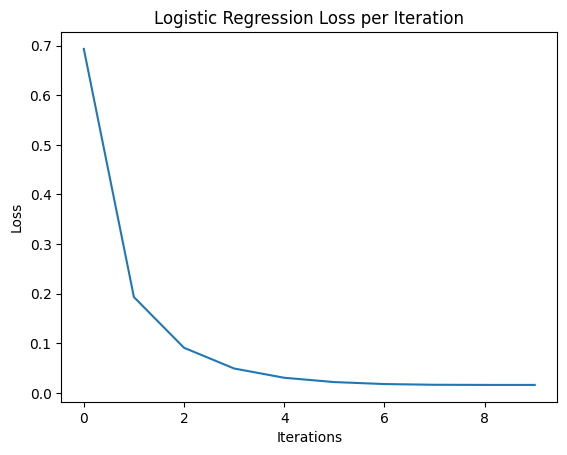

In [41]:
# Plot the loss function over iterations
plt. figure ()
plt. plot ( np. arange ( iterations ), loss_history_Newton )
plt. title ('Logistic Regression Loss per Iteration')
plt. xlabel ('Iterations')
plt. ylabel ('Loss')
plt. show ()

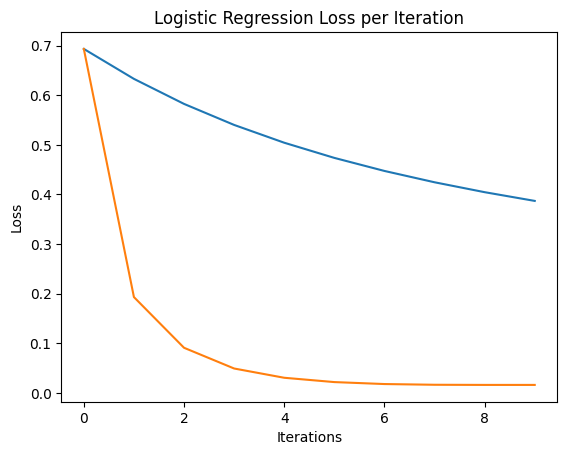

In [42]:
# plot both the loss functions
plt. figure ()
plt. plot ( np. arange ( iterations ), loss_history_BGD )
plt. plot ( np. arange ( iterations ), loss_history_Newton )
plt. title ('Logistic Regression Loss per Iteration')
plt. xlabel ('Iterations')
plt. ylabel ('Loss')
plt. show ()


# Question 02 : Perform Grid Search For Hyper-Parameter Tuning

In [43]:
from sklearn.datasets import clear_data_home
clear_data_home()


In [44]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . datasets import fetch_openml
from sklearn . linear_model import LogisticRegression
from sklearn . model_selection import GridSearchCV , train_test_split
from sklearn . pipeline import Pipeline
from sklearn . preprocessing import StandardScaler
from sklearn . metrics import accuracy_score
from sklearn . utils import check_random_state
# data loading
train_samples = 500
X, y = fetch_openml ("mnist_784", version =1, return_X_y =True ,as_frame = False )
random_state = check_random_state (0)
permutation = random_state . permutation (X. shape [0])
X = X[ permutation ]
y = y[ permutation ]
X = X. reshape ((X. shape [0] , -1))
X_train , X_test , y_train , y_test = train_test_split (X, y, train_size = train_samples , test_size =100)

/home/vishagar/Documents/Apps/VS_CODE/EN 3150/EN3150_Assignment_02/.venv/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [45]:
lasso_logistic_pipeline = Pipeline([('scaler', StandardScaler()), ('lasso_logistic', LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto'))])


param_grid = {'lasso_logistic__C': np.logspace(-2, 2, 9)}
#Initialize GridSearchCV
grid_search = GridSearchCV(lasso_logistic_pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best value of C
best_C = grid_search.best_params_['lasso_logistic__C']
print('Best C:', best_C)

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

/home/vishagar/Documents/Apps/VS_CODE/EN 3150/EN3150_Assignment_02/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best C: 0.31622776601683794
Test Accuracy: 0.85


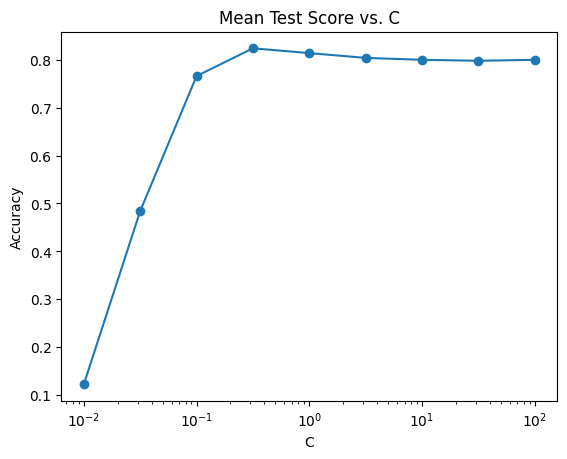

In [46]:
# Extract the hyperparameter values and corresponding mean test scores
C_values = np.logspace(-2, 2, 9)
mean_test_scores = grid_search.cv_results_['mean_test_score']
plt.semilogx(C_values, mean_test_scores, marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Mean Test Score vs. C')
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score
# Make predictions on the test set
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
# Print the metrics
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion_matrix)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.85
Confusion Matrix:
 [[ 6  0  0  0  0  1  0  0  1  0]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0]
 [ 0  1  0  0  8  0  0  0  0  2]
 [ 0  0  0  0  1  3  0  0  0  0]
 [ 0  0  0  0  1  0  8  0  0  0]
 [ 0  0  0  0  1  0  0 11  0  2]
 [ 0  0  0  0  1  0  0  0 11  0]
 [ 0  1  0  1  0  1  0  1  0 11]]
Precision: 0.8588888888888888
Recall: 0.85518759018759
F1 Score: 0.8526539913624311


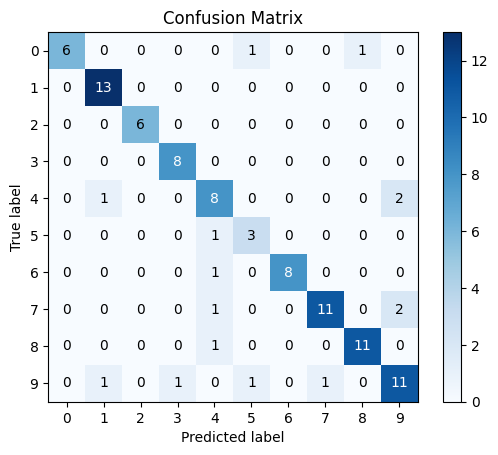

In [48]:
# Plot the confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.title('Confusion Matrix')
plt.show()